Download the glove.6B.zip from https://nlp.stanford.edu/projects/glove/

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
import gensim
from sklearn.decomposition import PCA
from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [4]:
%matplotlib inline
plt.style.use('ggplot')

In [16]:
dir_path = os.path.dirname(os.getcwd())
glove_file = os.path.join(dir_path, 'NLP/glove.6B.50d.txt')
word2vec_glove_file = get_tmpfile("glove.6B.50d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

(400000, 50)

In [17]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [18]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [19]:
analogy('france', 'paris', 'russia')

'moscow'

In [21]:
analogy('sweden', 'stockholm', 'norway')

'oslo'

In [24]:
analogy('germany', 'berlin', 'austria')

'vienna'

In [25]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab ]
    word_vectors = np.array([model[w] for w in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for pair in range(0, twodim.shape[0], 2):
        plt.plot([twodim[pair,0], twodim[pair+1,0]], [twodim[pair,1], twodim[pair+1,1]], linewidth=1., c='b')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

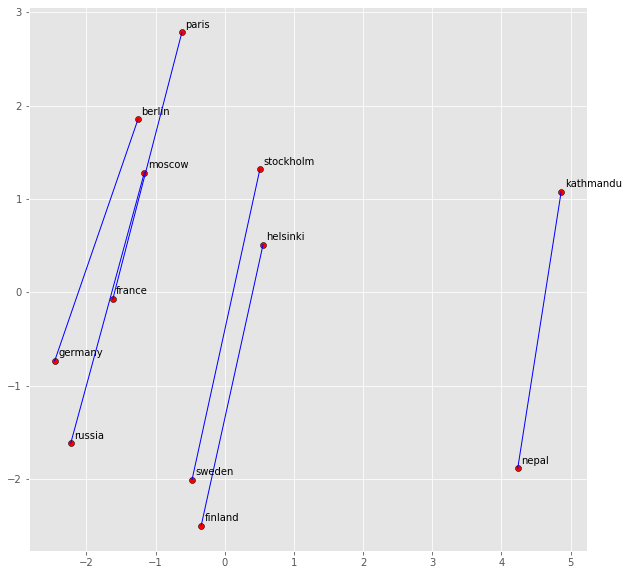

In [27]:
display_pca_scatterplot(model, ['france', 'paris', 'russia', 'moscow', 'finland', 'helsinki', 'sweden', 'stockholm', 'nepal', 'kathmandu', 'germany', 'berlin'])

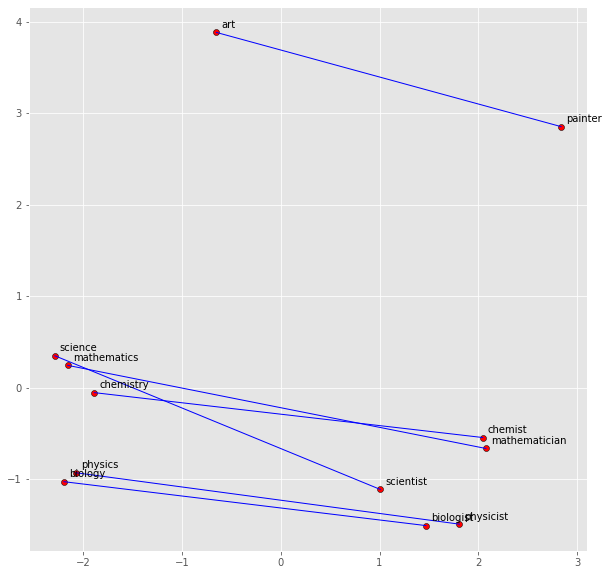

In [30]:
display_pca_scatterplot(model, ['science', 'scientist', 'physics', 'physicist', 'chemistry', 'chemist', 'biology', 'biologist', 'mathematics', 'mathematician', 'art', 'painter'])

In [1]:
import spacy
from scipy.spatial import distance

In [33]:
!python3 -m spacy download en_vectors_web_lg

     |████████████████████████████████| 634.0 MB 25.0 MB/s eta 0:00:01
  Created wheel for en-vectors-web-lg: filename=en_vectors_web_lg-2.3.0-py3-none-any.whl size=633155516 sha256=5beb12f97980aba8be0132f41d1c792a6affe08eb040d41be4ae6e236a76f88e
  Stored in directory: /private/var/folders/77/bdgbd5657rnccfxyzqvb3wvw00353c/T/pip-ephem-wheel-cache-x75789dd/wheels/f6/14/90/667aa9284545d9cfb9e7235322957786d4856c0bd91bb064d2
Successfully built en-vectors-web-lg
✔ Download and installation successful
You can now load the model via spacy.load('en_vectors_web_lg')


After download you might need to restart the kernel so that it can find the file.

In [2]:
nlp_lg = spacy.load("en_vectors_web_lg")

In [3]:
def spacy_analogy(nlp, w1, w2, w3):
    return nlp(w2).vector - nlp(w1).vector + nlp(w3).vector

In [6]:
# Format the vocabulary for use in the distance function
ids = [x for x in nlp_lg.vocab.vectors.keys()]
vectors = [nlp_lg.vocab.vectors[x] for x in ids]
vectors = np.array(vectors)

In [7]:
def analogy(nlp, w1, w2, w3):
    vec = spacy_analogy(nlp, w1, w2, w3)
    p = np.array([vec])
    distances = distance.cdist(p, vectors, 'cosine')
    distances = np.argsort(distances)
    closest_index = distances[0][3]
    word_id = ids[closest_index]
    return nlp.vocab[word_id].text

In [8]:
analogy(nlp_lg, 'france', 'paris', 'russia')

'Moscow'

In [9]:
analogy(nlp_lg, 'finland', 'helsinki', 'sweden')

'STOCKHOLM'

In [10]:
analogy(nlp_lg, 'switzerland', 'bern', 'germany')

'Berlin'

In [12]:
def display_spacy_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.vocab.keys()), sample)
        else:
            words = [ word for word in model.vocab.strings ]
    word_vectors = np.array([model(w).vector for w in words])
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    plt.figure(figsize=(10,10))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for pair in range(0, twodim.shape[0], 2):
        plt.plot([twodim[pair,0], twodim[pair+1,0]], [twodim[pair,1], twodim[pair+1,1]], linewidth=1., c='b')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

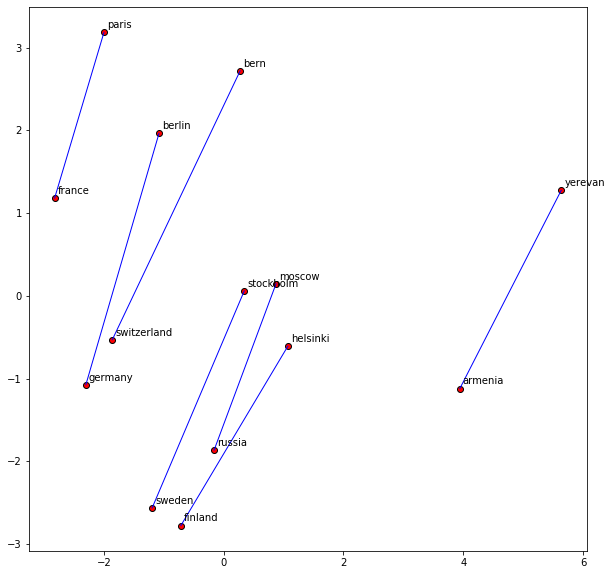

In [14]:
display_spacy_pca_scatterplot(nlp_lg, ['france', 'paris', 'russia', 'moscow', 'finland', 'helsinki', 'sweden', 'stockholm', 'armenia', 'yerevan', 'switzerland', 'bern', 'germany', 'berlin'])

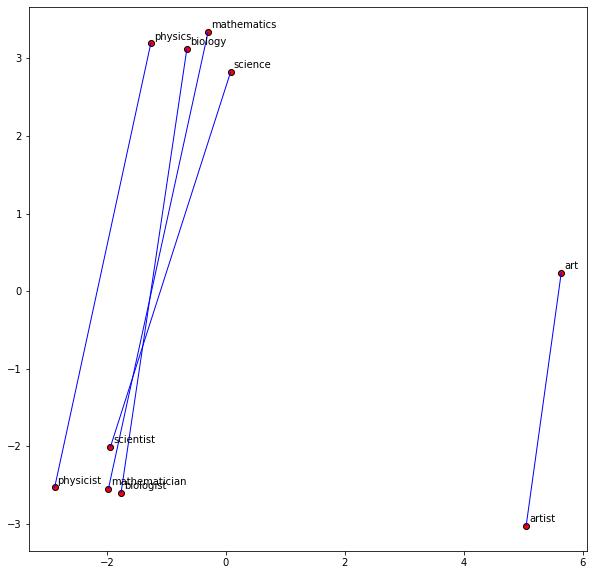

In [15]:
display_spacy_pca_scatterplot(nlp_lg, ['science', 'scientist', 'physics', 'physicist', 'biology', 'biologist', 'mathematics', 'mathematician', 'art', 'artist'])